# Assessement: Data Science for Drug Discovery

In [4]:
# delete unused modules at the end
from __future__ import division

# CORE
import pandas as pd
import sys
from io import StringIO

# MATPLOTLIB
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib
%matplotlib inline

# NUMPY
import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigvalsh,eigh

# RDKIT
from rdkit import Chem # rdkit contains a number of molecular descriptors
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions # modifying defaults
from rdkit.Chem.Draw import IPythonConsole # needed to show molecules
DrawingOptions.bondLineWidth=1.8
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from rdkit.Chem.Crippen import MolLogP,MolMR

# SCIKIT LEARN
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel

# MISCELLANEOUS
#import ES_ML_SOSSO.chemfun as cf
import seaborn as sns

Using matplotlib backend: QtAgg


In [186]:
from sklearn.neural_network import MLPRegressor

#### Data

In [5]:
# Import the data using pandas
data = pd.read_table("./COVID_moonshot_submissions-master/covid_submissions_all_info.csv"
                     , delimiter=',') # import dataset
data.shape # print shape

C:\Users\ronal\AppData\Local\Temp\ipykernel_21952\1849715330.py:2: DtypeWarning: Columns (3,6,7,9,10,11,12,13,14,15,18,19,27,28,29,30,31,32,33,34,35,36,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,69,70,71,72,73,74,75,76,84,85,86,87,89,90,91,92,93,94,95,96,104,105,106,107,109,110,111,112,113,114,115,116,124,125,126,127,129,130,131,132,133,134,135,136,144,145,146,147,149,150,151,152,153,154,155,156,164,165,166,167,169,170,171,172,173,174,175,176,184,185,186,187,189,190,191,192,193,194,195,196,204,205,206,207,209,210,211,212,213,214,215,216,224,225,226,227,229,230,231,232,233,234,235,236,244,245,246,247,249,253,254,255,256,257,258,259,275,276) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("./COVID_moonshot_submissions-master/covid_submissions_all_info.csv"


(20997, 277)

In [6]:
data.head(3) # quick sanity check

,SMILES,CID,CID (canonical),CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,fragments,...,f_hill_slope,f_R2,f_concentration_uM,f_inhibition_list,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,structure_ID,structure_LINK
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,ANT-DIA-3c79be55-1,ANT-DIA-3c79be55-1,ANT-DIA-3c7-1,https://covid.postera.ai/covid/submissions/3c7...,JNRKVADDLOBVCB-UHFFFAOYSA-N,"Anthony Aimon, Diamond Light Source Ltd",Nitrile of X0305 seems to be key and superimpo...,Nitrile and isosters should be tested,"x0072,x0305,x0387,x0434,x0678,x0830,x1249",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,ANT-DIA-3c79be55-2,ANT-DIA-3c79be55-2,ANT-DIA-3c7-2,https://covid.postera.ai/covid/submissions/3c7...,LVRULDIVMIRLIV-UHFFFAOYSA-N,"Anthony Aimon, Diamond Light Source Ltd",Nitrile of X0305 seems to be key and superimpo...,Nitrile and isosters should be tested,"x0072,x0305,x0387,x0434,x0678,x0830,x1249",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,ANT-DIA-3c79be55-3,ANT-DIA-3c79be55-3,ANT-DIA-3c7-3,https://covid.postera.ai/covid/submissions/3c7...,LMQZSJWRDIGOJW-UHFFFAOYSA-N,"Anthony Aimon, Diamond Light Source Ltd",Nitrile of X0305 seems to be key and superimpo...,Nitrile and isosters should be tested,"x0072,x0305,x0387,x0434,x0678,x0830,x1249",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Understanding the Data

`pandas` makes it really easy to analyze tabular data, here some basic/general and focused checks are carried out. With ML methods quality of the data is often the most important factor determining success of the model.

In [7]:
# Don't limit the coolumns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [8]:
# Describe the data
data.describe()
#data.describe(include='all')

,MW,cLogP,TPSA,Rotatable Bonds,Fraction sp3,HBA,HBD,CDD_mol_ID,fragments.1,fragments.1.1,fragments.1.1.1,fragments.1.1.1.1,fragments.1.1.1.1.1,fragments.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1,fragments.1.1.1.1.1.1.1.1.1,fragments.2,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio
count,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,2.093500e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,877.000000,0.0,0.0,2260.000000,0.0,0.0,0.0,163.0,0.0
mean,374.609035,2.746392,81.181727,4.635644,0.304874,4.700296,1.489654,8.249884e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.166328,NaN,NaN,38.720762,NaN,NaN,NaN,99.0,NaN
std,114.304562,1.596146,38.918840,3.039400,0.177025,1.929898,1.455965,8.023605e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.129719,NaN,NaN,43.707573,NaN,NaN,NaN,0.0,NaN
min,1.010000,-28.600000,0.000000,0.000000,0.000000,0.000000,0.000000,7.570814e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017013,NaN,NaN,0.002668,NaN,NaN,NaN,99.0,NaN
25%,307.199250,1.700000,60.850000,3.000000,0.180000,4.000000,1.000000,7.636979e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.688000,NaN,NaN,0.934926,NaN,NaN,NaN,99.0,NaN
50%,363.120000,2.860000,79.370000,4.000000,0.280000,5.000000,1.000000,8.011546e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.218407,NaN,NaN,10.889006,NaN,NaN,NaN,99.0,NaN
75%,436.060000,3.800000,97.560000,6.000000,0.400000,6.000000,2.000000,8.559166e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,99.500000,NaN,NaN,NaN,99.0,NaN
max,6915.710000,22.340000,2782.600000,232.000000,1.000000,100.000000,97.000000,1.051789e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.801670,NaN,NaN,198.000000,NaN,NaN,NaN,99.0,NaN


In [9]:
data.shape

(20997, 277)

In [10]:
# Check for number of missing values in columns
data.isna().sum().sort_values(ascending=False)

fragments.1.1.1.1.1.1.1.1    20997
fragments.1.1.1.1            20997
fragments.1                  20997
fragments.2                  20997
r_inhibition_at_20_uM        20997
                             ...  
MADE                             0
ASSAYED                          0
Postera Link                     0
CID                              0
SMILES                           0
Length: 277, dtype: int64

In [11]:
data_slim = data[['SMILES','f_avg_IC50','r_avg_IC50','covalent_warhead',
                  'Covalent Fragment', 'Nitrile Adduct',
                  'Chloroacetamide Adduct',
                  'Vinylsulfonamide Adduct',
                  'Acrylamide Adduct']].copy()
data_slim.head(35)

,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent Fragment,Nitrile Adduct,Chloroacetamide Adduct,Vinylsulfonamide Adduct,Acrylamide Adduct
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,NaN,NaN,True,True,False,False,False,False
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,NaN,NaN,True,True,False,False,False,False
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,NaN,NaN,True,True,False,False,False,False
3,CS(=O)(=O)Cc1ccc(C(=O)Nc2cccnc2)o1,NaN,NaN,False,True,False,False,False,False
4,O=C(Nc1cccnc1)c1ccc(N2CCC(O)CC2)o1,NaN,NaN,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
30,O=C(Nc1cccnc1)Nc1cccc(Cl)c1,NaN,NaN,False,False,False,False,False,False
31,O=C(Nc1cccnc1)Nc1cncc(Cl)c1,NaN,NaN,False,False,False,False,False,False
32,O=C(Cc1cncc(Cl)c1)Nc1cccnc1,NaN,NaN,False,False,False,False,False,False
33,N#Cc1cncc(CC(=O)Nc2cccnc2)c1,NaN,NaN,True,False,False,False,False,False


In [12]:
# Check for number of missing values in columns
data_slim.isna().sum().sort_values()

SMILES                         0
Chloroacetamide Adduct        23
Vinylsulfonamide Adduct       23
Acrylamide Adduct             23
covalent_warhead            1751
Covalent Fragment          13465
Nitrile Adduct             16109
f_avg_IC50                 18737
r_avg_IC50                 20120
dtype: int64

In [13]:
# Get counts of 'actives'[1]/'inactives'[0]
column_c = 'Chloroacetamide Adduct'
abundance_count = data_slim.groupby(column_c)[column_c].count() # using pandas groupby()
abundance_count

Chloroacetamide Adduct
False    20504
True       470
Name: Chloroacetamide Adduct, dtype: int64

In [14]:
# Convert columns to separate numpy arrays
smiles=data_slim['SMILES'].values


# Setting indices to know how data is split 
indices=np.arange(len(smiles))

# To store results
fine=[]
warnings=[]
errors=[]

#Chem.WrapLogs() # logging
sio = sys.stderr = StringIO() # error message

# Enumerate through smiles strings and check smi->mol functionality
# Append compound + data to `fine` list if no errors or just "WARNING"
for i,m in enumerate(smiles):
    
    Chem.MolFromSmiles(m)

    if sio.getvalue() == '': # no error
        fine.append([i, m])
        sio = sys.stderr = StringIO() # reset the error logger
    elif 'WARNING' in sio.getvalue(): # with RDKit "WARNING"
        warnings.append([i, m, sio.getvalue()[:]])
        fine.append([i, m])
        sio = sys.stderr = StringIO() # reset the error logger
    else: # with RDKit "ERROR"
        errors.append([i, m, sio.getvalue()[:]])
        sio = sys.stderr = StringIO() # reset the error logger

In [22]:
mols_result = []


for smiles in data_slim['SMILES']:
    mol = Chem.MolFromSmiles(smiles)
    mols_result.append(mol)

data_slim['mol'] = mols_result

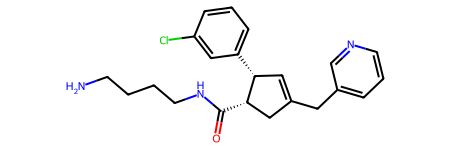

In [27]:
mols_result[100]

In [25]:
data_slim.rename(columns={'Chloroacetamide Adduct':'Chloroacetamide_Adduct',
                           'Covalent Fragment':'Covalent_Fragment', 'Nitrile Adduct':'Nitrile_Adduct',
                             'Vinylsulfonamide Adduct':'Vinylsulfonamide_Adduct',
                               'Acrylamide Adduct':'Acrylamide_Adduct'}, inplace=True)
data_slim.head(3)

,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,NaN,NaN,True,True,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF06...
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,NaN,NaN,True,True,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF06...
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,NaN,NaN,True,True,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF06...


In [32]:
data_slim_fic50 = data_slim.dropna(subset=['f_avg_IC50', 'covalent_warhead'])  # drop rows with NaN in column 'f_avg_IC50'
print(data_slim_fic50.shape)
data_slim_fic50.head(3)

(1854, 10)


,SMILES,f_avg_IC50,r_avg_IC50,covalent_warhead,Covalent_Fragment,Nitrile_Adduct,Chloroacetamide_Adduct,Vinylsulfonamide_Adduct,Acrylamide_Adduct,mol
24,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,54.272964,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF08...
27,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,63.554925,NaN,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF08...
35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,26.719515,14.641091,True,False,False,False,False,False,<rdkit.Chem.rdchem.Mol object at 0x000001ABF08...


#### Evaluation

In [149]:
# Evaluate trained NN using some common metrics...
def evaluate_mlc(estimator, trainData, testData, trainTargets, testTargets):
    # ACCURACY
    print(f"Mean Acc. (Train): {round(estimator.score(trainData, trainTargets), 4)}")
    print(f"Mean Acc. (Test): {round(estimator.score(testData, testTargets), 4)}")
    
    # PREDICTIONS
    TrainPred=estimator.predict(trainData).reshape(-1,1) # train pred.
    TestPred=estimator.predict(testData).reshape(-1,1) # test pred.
    
    # 5-fold Cross Validation
    scores_5f_tr = cross_val_score(estimator,trainData,trainTargets, cv=5)
    print(f"\n5-f CV (train)  = {round(scores_5f_tr.mean(), 4)} +/- {round(scores_5f_tr.std(), 3)}")
    
    # 5-fold Cross Validation -TEST
    scores_5f_te = cross_val_score(estimator,testData,testTargets, cv=5)
    print(f"5-f CV (test)  = {round(scores_5f_te.mean(), 4)} +/- {round(scores_5f_te.std(), 3)}")

    # Get confusion matrix as array of counts - ravel() flatten to vars
    # tn=true negative, fp=false positive, fn=false negative, tp=true positive
    # tn, fp, fn, tp = confusion_matrix(testTargets,
    #                                   TestPred).ravel() # extract metrics
    # # Get P & N
    # TestTargets_counts = pd.DataFrame(testTargets, columns=['p_np'])
    # TestTargets_counts = TestTargets_counts.groupby("p_np")["p_np"].count()
    # n = TestTargets_counts[0]
    # p = TestTargets_counts[1]
    
    
    # # ROC-AUC SCORE - Training
    # ROC_AUC = roc_auc_score(trainTargets, TrainPred)
    # print(f"\nROC-AUC (train): {round(ROC_AUC, 4)}")
    # # ROC-AUC SCORE - Test
    # ROC_AUC = roc_auc_score(testTargets, TestPred)
    # print(f"ROC-AUC (test): {round(ROC_AUC, 4)}")
    # MCC = (tn*tp-fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    # print(f"MCC: {round(MCC, 4)}")

    # TPR = tp/p # true positive rate
    # print(f"\nTPR: {round(TPR, 4)}")
    # TNR = tn/n # true negative rate
    # print(f"TNR: {round(TNR, 4)}")
    # print(f"\n     TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    #print(confusion_matrix(testTargets, TestPred))
    
    # # CONFUSION MATRIX PLOT
    # plot_confusion_matrix(estimator, testData, testTargets,
    #                       cmap='winter', normalize='pred',
    #                       include_values=True)
    #plt.plot()
    
#evaluate_mlc(clf, SDTR, SDTE, TrainTargets_np, TestTargets_np)

#### Splitting Data

In [85]:
#smiles=data_slim_fic50['SMILES'].values
mols=data_slim_fic50['mol'].values
ic50=data_slim_fic50['f_avg_IC50'].values
covalent_warhead=data_slim_fic50['covalent_warhead'].values

In [92]:
# Split dataset, random seed
Train_sm, Test_sm, Train_ic50, Test_ic50, Train_warh, Test_warh = train_test_split(mols,ic50,
                                                                                   covalent_warhead,
                                                                                   test_size=0.3,
                                                                                   random_state=1)

In [132]:
# Format data
Train_m_np = np.array(Train_sm)
Test_m_np = np.array(Test_sm)
Train_ic50_np = np.log10(np.array(Train_ic50)*1000).astype(float)    
Test_ic50_np = np.log10(np.array(Test_ic50)*1000).astype(float)
Train_warh_np = np.array(Train_warh).astype(int).astype(float)
#Train_warh_np = Train_warh_np.astype(int).astype(float)
Test_warh_np = np.array(Test_warh).astype(int).astype(float)
#Test_warh_np = Test_warh_np.astype(int)
#Test_warh_np = [int(x == 'False') for x in Test_warh_np]

In [133]:
Train_ic50_np[250:300]

array([2.00481102, 4.05140689, 4.99782308, 4.99782308, 4.99782308,
       4.56267037, 4.8842862 , 3.63638028, 3.87377209, 3.50736803,
       4.99782308, 2.99929183, 4.76681493, 3.69763561, 4.59374518,
       3.08003303, 4.5361574 , 3.29078975, 4.12030292, 4.99782308,
       2.98892466, 4.99782308, 4.70290248, 4.99782308, 4.77206504,
       4.20054737, 4.15279224, 3.24197362, 4.80300079, 3.30397656,
       3.90189628, 1.70908413, 4.32715118, 3.92628308, 4.99782308,
       4.99782308, 3.6816514 , 3.71155244, 4.9338618 , 3.76055763,
       4.99782308, 2.81394531, 4.11544289, 3.9603657 , 3.26647312,
       3.54479041, 4.81679796, 4.20589587, 4.06801086, 2.84929271])

In [134]:
Train_warh_np[250:300]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.])

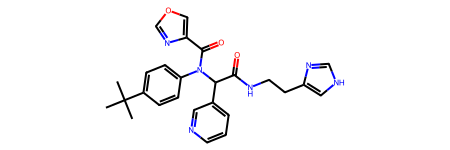

In [135]:
Train_m_np[1]

#### Calculating Descriptors

In [231]:
MFSA = [Train_m_np, Test_m_np] # combine for loop
WSFA = [Train_warh_np, Test_warh_np] # combine for loop
SDTR = []; SDTE = [] # to store descriptors
SDA = [SDTR, SDTE] # combine for loop

notes = [] # For summary
faulty_desc = []
faulty_idx = []
desc_list = [] # List of attached descriptors

In [ ]:
def compute_descriptors(molecule):
    descriptors = {d[0]: d[1](molecule) for d in Descriptors.descList}
    descriptors = pd.Series(descriptors)
    return descriptors



In [232]:
# Manually store names for feature evaluation later
desc_names = ['HeavyAtomCount', 'TPSA', 'NumHAcceptors',
              'NumHDonors', 'NumHeteroatoms', 'PEOE_VSA10',
              'VSA_EState3', 'NOCount', 'MolLogP', 'NHOHCount']

# Add dedscriptors to each molecule
for i, k in enumerate(SDA):
    for j, m in enumerate(MFSA[i]):
        # desc=[]
        # desc.append(Chem.Lipinski.HeavyAtomCount(m)) # no. of heavy atoms
        # desc.append(Descriptors.TPSA(m)) # from J. Med. Chem. 43:3714-7, (2000)
        # desc.append(Descriptors.NumHAcceptors(m))
        # desc.append(Descriptors.NumHDonors(m))
        # desc.append(Descriptors.NumHeteroatoms(m))
        # desc.append(Descriptors.PEOE_VSA10(m))
        # desc.append(Descriptors.VSA_EState3(m))
        # desc.append(Descriptors.NOCount(m))
        # desc.append(Descriptors.MolLogP(m))
        # desc.append(Descriptors.NHOHCount(m))

        f=0 # failure count
        faulty_desc_i = []
        faulty_idx_i = []
        desc=[]
        desc_list_i = []
        for d, j in enumerate(range(len(dir(Descriptors)))):
            try:
                desc_j = getattr(Descriptors, dir(Descriptors)[j])
                desc_val = desc_j(m)
                if isinstance(desc_val, tuple): # prevent tuples as desc.'s
                    faulty_desc_i.append(f'TupleError: {dir(Descriptors)[j]}')
                    continue
                #if desc_val == 'Nan':
                #    continue
                desc.append(desc_val)
                desc_list_i.append((dir(Descriptors)[j]))
            except:
                #print(f"Fail at Descriptor {j}")
                faulty_desc_i.append(dir(Descriptors)[j])
                faulty_idx_i.append(d)
                f += 1 # add to failure counter

        desc.append(WSFA[i][j]) # add warhead
        k.append(desc)

        
    faulty_desc.append(faulty_desc_i)
    faulty_idx.append(faulty_idx_i)
    notes.append(f"SDA item {i} had {f} failures")
    desc_list.append(desc_list_i)
#len(SDTR)

2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 tests in 2 items.
0 passed and 0 failed.
Test passed.
2 items had no tests:
    __main__
    __main__.evaluate_mlc
0 t

In [233]:
len(SDTR[0])

405

In [234]:
notes

['SDA item 0 had 23 failures', 'SDA item 1 had 23 failures']

In [235]:
len(desc_list_i)

404

In [236]:
# Which descriptors failed? Training: index 0, Test: index 1 (should match)
faulty_desc[0]

['Chem',
 'PropertyFunctor',
 'TupleError: _ChargeDescriptors',
 '_FingerprintDensity',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_descList',
 '_du',
 '_rdMolDescriptors',
 '_runDoctests',
 '_setupDescriptors',
 'abc',
 'autocorr',
 'descList',
 'names',
 'rdMolDescriptors',
 'rdPartialCharges',
 'setupAUTOCorrDescriptors']

In [259]:
faulty_idx[0]

[204,
 283,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 332,
 333,
 334,
 335,
 336,
 337,
 423,
 425,
 426,
 427]

In [251]:
# Check which columns contain missing values
# Output truncated for readability
#faults = (~np.isnan(SDTR).any(axis=0)).tolist()
#list(zip(faults, desc_list[0]))[:10] # zip to desc name for readability

In [298]:
# Check how many failures for train/test - these columns were not added
#faulty_desc

In [299]:
#print(SDTR[:][283])

In [294]:
idx = np.where((np.array(SDTR)[:][:]) == False)
#idx = SDTR.tolist().index(False)
print(set(idx[1]))

{2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 56, 57, 58, 59, 65, 66, 67, 68, 74, 75, 76, 83, 84, 85, 92, 93, 94, 101, 102, 103, 107, 108, 109, 116, 117, 118, 124, 125, 127, 133, 134, 135, 142, 143, 144, 148, 151, 152, 153, 159, 160, 161, 162, 168, 169, 170, 171, 177, 178, 179, 186, 187, 188, 189, 190, 191, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 231, 251, 253, 254, 255, 256, 257, 258, 260, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 295, 296, 297, 299, 300, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,

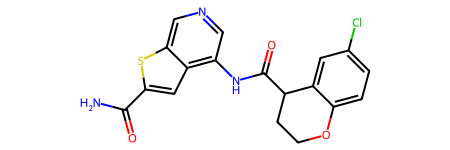

In [279]:
Train_m_np[218]

In [295]:
X_train_og = np.array(SDTR.copy())
df = pd.DataFrame(X_train_og)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404
0,3.885,3.831,-0.017,-0.085,-0.059,-0.071,0.274,-0.385,0.223,0.02,-0.301,0.154,3.881,-0.022,-0.201,-0.04,0.001,0.165,-0.119,-0.198,-0.001,0.06,-0.194,3.76,-0.211,-0.493,0.226,0.014,-0.251,0.144,-0.034,-0.133,0.054,-0.314,3.631,0.067,0.057,-0.278,0.023,0.16,-0.143,-0.201,-0.048,0.156,-0.24,3.566,0.07,-0.074,0.096,-0.01,-0.259,0.919,0.841,0.691,0.762,0.919,3.515,1.312,0.945,0.96,1.27,0.745,0.804,1.185,0.776,1.024,1.126,3.568,0.932,0.638,0.711,0.954,1.127,0.956,1.038,1.16,1.115,1.482,3.669,0.706,0.749,1.016,0.668,1.026,1.054,0.919,1.291,0.977,0.829,4.044,1.252,0.998,0.808,1.051,1.037,0.788,0.752,1.151,0.898,1.012,4.065,0.925,0.949,1.129,4.18,3.982,3.855,3.795,3.721,3.741,3.481,3.792,3.833,3.684,3.574,4.174,3.516,3.461,3.553,3.671,4.049,4.069,3.986,3.861,3.783,3.713,4.11,3.726,5.365,6.058,5.824,6.007,5.678,5.866,5.794,5.659,1.624,3.989,2.159,2.128,1.472,1.819,2.073,1.48,4.462,0.318,0.449,0.348,4.014,0.336,0.348,0.339,0.244,0.247,0.169,0.397,0.338,0.334,0.316,3.876,0.337,0.259,0.242,1.298,1.341,0.917,0.978,0.98,1.025,0.69,4.012,0.811,0.286,0.44,0.415,0.365,0.358,0.337,0.261,0.252,77.326,3.509,132.89,137.034,123.038,93.126,93.684,87.239,88.841,0.071,-0.071,-0.049,2.787632,2.254548,-2.350899,2.256735,-2.48707,7.885773,-0.115115,35.495692,10.091415,1.45487,1235.725013,{},22.716968,17.791392,19.363817,15.352505,10.50357,12.490699,7.737483,10.431496,5.611299,7.711054,3.920929,5.257653,10.023291,13.212334,0.0,18.080855,36.889045,22.023286,4.305216,25.383791,36.398202,15.200677,11.60094,472.133589,1.09375,1.84375,2.59375,0.304348,-2.68,32,447.798,16477243.813041,22.511672,9.439852,5.033246,192.598609,12.741908,0.368836,12.741908,0.228355,0.106791,0.228355,-3.181995,-0.368836,3.5411,128.7755,472.998,1,7,0,1,1,2,1,3,5,1,9,0,6,0,1,1,168,10.216698,0.0,0.0,15.930471,0.0,0.0,9.778516,8.417797,4.305216,0.0,35.866408,30.68629,53.858337,24.057905,4,13.212334,49.678632,0.0,9.289195,0.0,13.344559,42.148578,65.444341,0.0,0.0,15.125,10.216698,11.374773,0.0,11.60094,55.54605,21.23865,0.0,12.487189,54.858257,5.022633,10.772448,0.0,82.61,25.720921,6.340018,19.045199,5.382425,2.352857,-0.050405,13.324102,3.57754,3.683783,-3.181995,False,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.59295,0.0
1,3.749,3.87,-0.012,0.001,-0.124,0.065,-0.093,-0.244,0.119,0.09,-0.016,-0.003,3.847,-0.109,0.075,-0.075,-0.178,0.123,0.036,-0.011,0.002,-0.125,0.065,3.936,-0.094

In [297]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404
count,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.0,1297.000,1297.00,1297.00,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.0,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.0,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.00,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000,1297.00,1297.000,1297.000,1297.000,1297.000,1297.000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297,1297.000000,1297.00000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.0,1297.000000,1297.0,1297.00000,1297.000000,1297.000000,1297.0,1297.000000,1297.000000,1297.000000,1297.00000,1297.000000,1297.0,1297.0,1297.0,1297.0,1297.00,1297,1297.000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.0000,1297.0000,1297.000,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297.000000,1297.0,1297.0,1297.00000,1297.0,1297.

In [256]:
# Remove columns with missing values...
X_train_og = np.array(SDTR.copy())
print(f"Before: {X_train_og.shape}")
X_train = X_train_og.copy()[:, ~pd.isna(X_train_og).any(axis=0)]
print(f"After: {X_train.shape}")

Before: (1297, 405)
After: (1297, 405)


#### Training an NN

In [187]:
regr = MLPRegressor(random_state=1, max_iter=600,
                    hidden_layer_sizes=(150, 300, 150),
                    alpha=1e-5)
regr.fit(SDTR, Train_ic50_np)


TypeError: float() argument must be a string or a number, not 'dict'

In [177]:
from sklearn.metrics import r2_score

In [178]:
test = regr.predict(SDTE)
test
r2_score(Test_ic50_np, test)
#regr.score(SDTE, Test_ic50_np)

0.3445781583347016

In [152]:
Test_ic50_np

array([3.75741822, 2.9404428 , 2.83205505, 4.99782308, 4.99782308,
       4.99782308, 4.99782308, 3.79673698, 3.19893578, 2.75796298,
       3.47105676, 3.52437544, 2.41091759, 3.92107323, 4.99782308,
       2.84929271, 4.69583582, 3.72114991, 4.29092602, 4.72095243,
       4.99782308, 4.99782308, 3.08003303, 4.61400132, 2.35169779,
       4.99782308, 4.32276111, 1.80799079, 3.14520505, 3.72707725,
       2.5250162 , 4.99782308, 4.37906246, 2.94147286, 4.99782308,
       3.2956523 , 4.73051287, 4.99782308, 4.99782308, 4.99782308,
       4.36026495, 4.86059314, 4.48714198, 3.52916172, 4.99782308,
       4.34593034, 4.99782308, 4.72535394, 4.48426677, 1.92445022,
       4.99782308, 4.99563519, 2.79436961, 2.98404531, 2.22449465,
       4.97349563, 3.11595385, 3.58475623, 4.99782308, 3.80540638,
       4.99782308, 4.99782308, 4.99782308, 2.13087781, 4.99782308,
       4.15279224, 4.99782308, 1.92445022, 3.70075289, 2.69614534,
       4.99782308, 4.99782308, 3.79359194, 4.99782308, 4.99782

In [150]:
evaluate_mlc(regr, SDTR, SDTE, Train_ic50_np, Test_ic50_np)

Mean Acc. (Train): 0.2099
Mean Acc. (Test): 0.1824

5-f CV (train)  = 0.2049 +/- 0.085
5-f CV (test)  = 0.1499 +/- 0.069


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)